<a href="https://colab.research.google.com/github/BagusDAriAwan/creditcard-fraud/blob/master/percobaan_1_ULB_fitur_terbaik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import random as rn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import time

In [307]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score


In [0]:
def convert(y):
    for i in range(y.shape[0]):
        if y[i]==-1:
            y[i]=1;
        else:
            y[i]=0
    return y

In [0]:
def model_evaluate(ifor,X,y):
    ts = time.time()
    y_pred=ifor.predict(X)
    tf = time.time()
    print('time : ', tf-ts)
    y_pred=convert(y_pred)
    
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    print('accuracy : ',accuracy)
    print('sensitivity : ',sensitivity)
    print('specifity : ', specifity)
    print('precision : ',precision)
    print('recall : ',recall)
    print('f1 score : ',f1_score)
    print('Confusion matrix')
    TP,FP,FN,TN = confussion_matrik(y,y_pred)
    print('TP = ',TP,'FP = ',FP,'FN = ',FN,'TN = ',TN)
    df_cm = pd.DataFrame([[TN,FP],[FN,TP]],
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sb.set(font_scale=1.4)#for label size
    sb.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [0]:
def iForest(X, ntree, sample, th):
    ifor = IsolationForest(n_estimators=ntree, max_samples=sample, contamination=th, random_state=1)
#     ifor = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.0039, max_features=1.0, random_state=42, verbose=0)
    ifor.fit(X)
    return ifor

In [0]:
def eval_model(ifor,X,y):
#     ts = time.time()
    y_pred=ifor.predict(X)
#     tf = time.time()
    y_pred=convert(y_pred)
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    return accuracy,sensitivity,specifity,precision,recall,f1_score

In [0]:
df=pd.read_csv("drive/My Drive/Colab Notebooks/ULB/creditcard.csv")
y=df['Class']

In [314]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [0]:
df_data=df.drop(['Class'], axis=1)

In [316]:
yab = y[y==1]
th = len(yab)/len(y)
th

0.001727485630620034

In [0]:
# scaler = MinMaxScaler()
# Xtrain_norm = scaler.fit_transform(X_train)
# pca=PCA(n_components=2).fit(Xtrain_norm)
# pca2dtrain = pca.transform(Xtrain_norm)
# plt.figure(figsize=(10, 8))
# plt.scatter(pca2dtrain[:,0], pca2dtrain[:,1], c=y_train, cmap='Spectral')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_data, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

In [318]:
print(len(X_train),len(X_val),len(X_test))

170883 56962 56962


In [0]:
ytrain_ab = y_train[y_train==1]
yval_ab = y_val[y_val==1]
ytest_ab = y_test[y_test==1]

In [0]:
y_test = np.array(y_test)
y_train=np.array(y_train)
y_val = np.array(y_val)

In [321]:
th_train=len(ytrain_ab)/len(y_train)
th_test=len(ytest_ab)/len(y_test)
th_val=len(yval_ab)/len(y_val)
print('threshold train =',th_train, 'threshold test =', th_test,'threshold val =', th_val)

threshold train = 0.0017263273701889597 threshold test = 0.0017204452090867595 threshold val = 0.0017380007724447878


In [322]:
ifo= iForest(X_train, 100, 256, th_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.9700486660003662
accuracy :  0.9973491099329378
sensitivity :  0.30303030303030304
specifity :  0.9985579374989009
precision :  0.26785714285714285
recall :  0.30303030303030304
f1 score :  0.2843601895734597
Confusion matrix
TP =  30 FP =  82 FN =  69 TN =  56781


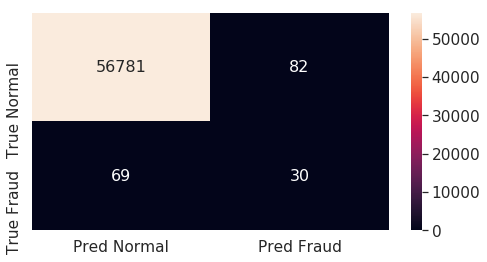

In [323]:
model_evaluate(ifo,X_val,y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.9691786766052246
accuracy :  0.9973842210596539
sensitivity :  0.2857142857142857
specifity :  0.9986107203151379
precision :  0.2616822429906542
recall :  0.2857142857142857
f1 score :  0.2731707317073171
Confusion matrix
TP =  28 FP =  79 FN =  70 TN =  56785


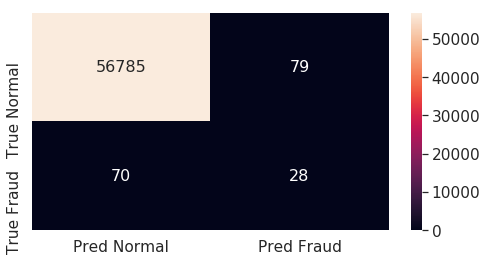

In [324]:
model_evaluate(ifo, X_test, y_test)

## Fitur Terbaik
1) V14 : 0.191396,
 2) V4 : 0.156735,
 3) V17 : 0.154208,
 4) V12 : 0.153089,
 5) V11 : 0.075608,
 6) V2 : 0.051632,
 7) V10 : 0.038917,
 8) V7 : 0.015483,
 9) V20 : 0.014762,
10) V21 : 0.013873,
11) V19 : 0.012698,
12) V8 : 0.011657,
13) V6 : 0.010132,
14) V27 : 0.009422,
15) V3 : 0.007821,
16) V26 : 0.007501,
17) V9 : 0.007076,
18) Amount : 0.007075,
19) V13 : 0.006597,
20) V15 : 0.006509,
21) V23 : 0.006476,
22) V22 : 0.006006,
23) V1 : 0.005765,
24) V24 : 0.005645,
25) V28 : 0.005104,
26) V18 : 0.004795,
27) V16 : 0.004732,
28) V25 : 0.004156,
29) V5  :0.003216,
30) Time : 0.001916

### percobaan1.1- 3 fitur terbaik

In [325]:
X1 = df_data[['V14','V4','V17']]
X1.head()

,V14,V4,V17
0,-0.311169,1.378155,0.207971
1,-0.143772,0.448154,-0.114805
2,-0.165946,0.379780,1.109969
3,-0.287924,-0.863291,-0.684093
4,-1.119670,0.403034,-0.237033


In [326]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=1, stratify=y)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.25, random_state=1, stratify=y1_train)

In [328]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
65782,51742.0,1.217770,0.077244,0.498321,0.520815,-0.574932,-0.708602,-0.159101,0.039746,0.046620,0.154164,1.187396,0.140420,-1.493653,0.778755,0.520577,0.580438,-0.575816,0.164916,0.183084,-0.194239,-0.226154,-0.773018,0.145243,0.276868,0.129511,0.083098,-0.043997,0.004983,0.99
86825,61413.0,0.665294,-0.779358,1.680700,3.158373,-1.445562,0.721120,-0.733349,0.351817,0.947691,0.243382,-1.658432,-0.199440,-1.251737,-0.703287,-1.443037,0.238003,0.082585,-0.091704,-0.587019,0.173780,0.046143,-0.017651,-0.209463,0.385115,0.296200,0.082171,0.025492,0.071064,214.04
117627,74745.0,1.272176,0.169925,-0.179971,1.062221,0.521140,0.614676,0.017768,0.087789,0.419398,-0.114285,-1.824942,-0.045081,-0.098062,0.022784,0.031038,-0.305480,-0.233495,-0.496386,0.162940,-0.167845,-0.199115,-0.329121,-0.228425,-1.313537,0.844641,-0.224776,0.037536,0.000581,3.76
225290,144191.0,-7.725336,-2.354526,-4.607707,0.164617,-6.985642,5.637628,5.313883,0.660609,0.064677,-1.277915,0.514201,0.567617,0.595351,0.737138,1.407868,1.836046,-0.185454,-0.439954,-0.642606,-5.028523,-1.073901,1.173600,-0.183291,-0.584831,0.008990,0.618218,-0.579530,-0.606947,1395.00
125927,77866.0,-0.517416,0.313686,1.537756,-1.558396,0.700028,1.288011,0.271898,0.507856,0.038740,-0.460233,2.212832,0.732872,-0.618835,0.113776,0.984074,-0.480702,0.180416,-1.792959,-2.015641,-0.062246,0.010926,0.338478,0.066529,-0.989922,-0.638208,0.806935,0.075750,-0.181417,7.68


In [329]:
print(len(X1_train),len(X1_val),len(X1_test))

170883 56962 56962


In [330]:
y1train_ab = y1_train[y1_train==1]
y1val_ab = y1_val[y1_val==1]
y1test_ab = y1_test[y1_test==1]
print('fraud total =',len(yab),'fraud train =',len(y1train_ab),'fraud val =',len(y1val_ab),'fraud test =',len(ytest_ab))

fraud total = 492 fraud train = 295 fraud val = 99 fraud test = 98


In [0]:
y_test1 = np.array(y1_test)
y_train1=np.array(y1_train)
y_val1 = np.array(y1_val)

In [332]:
th_train1=len(y1train_ab)/len(y1_train)
th_test1=len(y1test_ab)/len(y1_test)
th_val1=len(y1val_ab)/len(y1_val)
print('threshold train =',th_train1, 'threshold test =', th_test1,'threshold val =', th_val1)

threshold train = 0.0017263273701889597 threshold test = 0.0017204452090867595 threshold val = 0.0017380007724447878


In [337]:
ifo1 = iForest(X1_train, 100, 256, th_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.414790391921997
accuracy :  0.9985604438046417
sensitivity :  0.6060606060606061
specifity :  0.9992437964933261
precision :  0.5825242718446602
recall :  0.6060606060606061
f1 score :  0.5940594059405939
Confusion matrix
TP =  60 FP =  43 FN =  39 TN =  56820


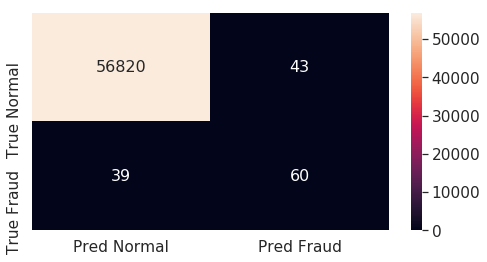

In [338]:
model_evaluate(ifo1,X1_val,y_val1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.4270029067993164
accuracy :  0.9986306660580738
sensitivity :  0.6326530612244898
specifity :  0.9992613956105796
precision :  0.5961538461538461
recall :  0.6326530612244898
f1 score :  0.6138613861386137
Confusion matrix
TP =  62 FP =  42 FN =  36 TN =  56822


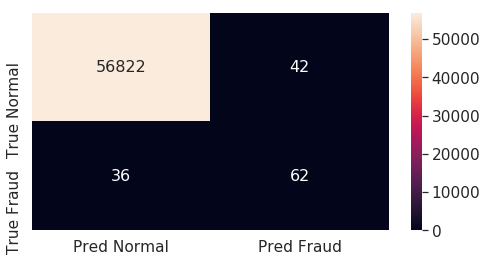

In [339]:
model_evaluate(ifo1, X1_test, y_test1)

### percobaan1.2 - 5 fitur terbaik

In [340]:
X2 = df_data[['V14','V4','V17','V12','V11']]
X2.head()

,V14,V4,V17,V12,V11
0,-0.311169,1.378155,0.207971,-0.617801,-0.551600
1,-0.143772,0.448154,-0.114805,1.065235,1.612727
2,-0.165946,0.379780,1.109969,0.066084,0.624501
3,-0.287924,-0.863291,-0.684093,0.178228,-0.226487
4,-1.119670,0.403034,-0.237033,0.538196,-0.822843


In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=1, stratify=y)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.25, random_state=1, stratify=y2_train)

In [342]:
print(len(X2_train),len(X2_val),len(X2_test))

170883 56962 56962


In [0]:
y2train_ab = y2_train[y2_train==1]
y2val_ab = y2_val[y2_val==1]
y2test_ab = y2_test[y2_test==1]

In [0]:
y_test2 = np.array(y2_test)
y_train2=np.array(y2_train)
y_val2 = np.array(y2_val)

In [345]:
th_train2=len(y2train_ab)/len(y2_train)
th_test2=len(y2test_ab)/len(y2_test)
th_val2=len(y2val_ab)/len(y2_val)
print('threshold train =',th_train2, 'threshold test =', th_test2,'threshold val =', th_val2)

threshold train = 0.0017263273701889597 threshold test = 0.0017204452090867595 threshold val = 0.0017380007724447878


In [346]:
ifo2 = iForest(X2_train, 100, 256, th_train2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.4685695171356201
accuracy :  0.9990344440153085
sensitivity :  0.7575757575757576
specifity :  0.9994548300300723
precision :  0.7075471698113207
recall :  0.7575757575757576
f1 score :  0.7317073170731707
Confusion matrix
TP =  75 FP =  31 FN =  24 TN =  56832


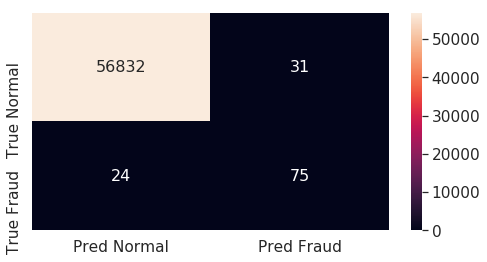

In [347]:
model_evaluate(ifo2,X2_val,y_val2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.5111591815948486
accuracy :  0.9993328885923949
sensitivity :  0.8061224489795918
specifity :  0.9996658694428813
precision :  0.8061224489795918
recall :  0.8061224489795918
f1 score :  0.806122448979592
Confusion matrix
TP =  79 FP =  19 FN =  19 TN =  56845


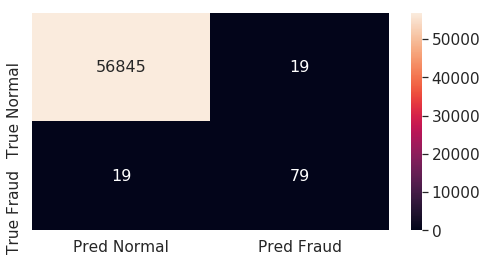

In [348]:
model_evaluate(ifo2, X2_test, y_test2)

### percobaan1.3 - 7 fitur terbaik

In [349]:
X3 = df_data[['V14','V4','V17','V12','V11','V2','V10']]
X3.head()

,V14,V4,V17,V12,V11,V2,V10
0,-0.311169,1.378155,0.207971,-0.617801,-0.551600,-0.072781,0.090794
1,-0.143772,0.448154,-0.114805,1.065235,1.612727,0.266151,-0.166974
2,-0.165946,0.379780,1.109969,0.066084,0.624501,-1.340163,0.207643
3,-0.287924,-0.863291,-0.684093,0.178228,-0.226487,-0.185226,-0.054952
4,-1.119670,0.403034,-0.237033,0.538196,-0.822843,0.877737,0.753074


In [0]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=1, stratify=y)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.25, random_state=1, stratify=y3_train)

In [351]:
print(len(X3_train),len(X3_val),len(X3_test))

170883 56962 56962


In [0]:
y3train_ab = y3_train[y3_train==1]
y3val_ab = y3_val[y3_val==1]
y3test_ab = y3_test[y3_test==1]

In [0]:
y_test3 = np.array(y3_test)
y_train3=np.array(y3_train)
y_val3 = np.array(y3_val)

In [354]:
th_train3=len(y3train_ab)/len(y3_train)
th_test3=len(y3test_ab)/len(y3_test)
th_val3=len(y3val_ab)/len(y3_val)
print('threshold train =',th_train3, 'threshold test =', th_test3,'threshold val =', th_val3)

threshold train = 0.0017263273701889597 threshold test = 0.0017204452090867595 threshold val = 0.0017380007724447878


In [355]:
ifo3 = iForest(X3_train, 100, 256, th_train3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.4634478092193604
accuracy :  0.9985077771145676
sensitivity :  0.5252525252525253
specifity :  0.9993317271336369
precision :  0.5777777777777777
recall :  0.5252525252525253
f1 score :  0.5502645502645503
Confusion matrix
TP =  52 FP =  38 FN =  47 TN =  56825


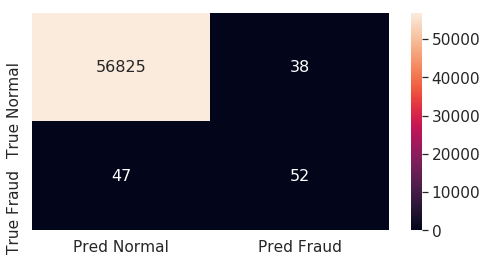

In [356]:
model_evaluate(ifo3,X3_val,y_val3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.4789352416992188
accuracy :  0.9986131104947158
sensitivity :  0.6836734693877551
specifity :  0.9991558806978053
precision :  0.5826086956521739
recall :  0.6836734693877551
f1 score :  0.6291079812206573
Confusion matrix
TP =  67 FP =  48 FN =  31 TN =  56816


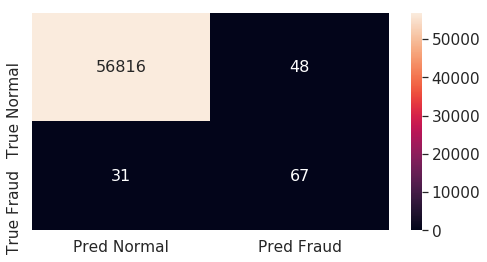

In [357]:
model_evaluate(ifo3, X3_test, y_test3)

### percobaan1.4 - 10 fitur terbaik

In [358]:
X4 = df_data[['V14','V4','V17','V12','V11','V2','V10','V7','V20','V21']]
X4.head()

,V14,V4,V17,V12,V11,V2,V10,V7,V20,V21
0,-0.311169,1.378155,0.207971,-0.617801,-0.551600,-0.072781,0.090794,0.239599,0.251412,-0.018307
1,-0.143772,0.448154,-0.114805,1.065235,1.612727,0.266151,-0.166974,-0.078803,-0.069083,-0.225775
2,-0.165946,0.379780,1.109969,0.066084,0.624501,-1.340163,0.207643,0.791461,0.524980,0.247998
3,-0.287924,-0.863291,-0.684093,0.178228,-0.226487,-0.185226,-0.054952,0.237609,-0.208038,-0.108300
4,-1.119670,0.403034,-0.237033,0.538196,-0.822843,0.877737,0.753074,0.592941,0.408542,-0.009431


In [0]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state=1, stratify=y)
X4_train, X4_val, y4_train, y4_val = train_test_split(X4_train, y4_train, test_size=0.25, random_state=1, stratify=y4_train)

In [360]:
print(len(X4_train),len(X4_val),len(X4_test))

170883 56962 56962


In [0]:
y4train_ab = y4_train[y4_train==1]
y4val_ab = y4_val[y4_val==1]
y4test_ab = y4_test[y4_test==1]

In [0]:
y_test4 = np.array(y4_test)
y_train4=np.array(y4_train)
y_val4 = np.array(y4_val)

In [363]:
th_train4=len(y4train_ab)/len(y4_train)
th_test4=len(y4test_ab)/len(y4_test)
th_val4=len(y4val_ab)/len(y4_val)
print('threshold train =',th_train4, 'threshold test =', th_test4,'threshold val =', th_val4)

threshold train = 0.0017263273701889597 threshold test = 0.0017204452090867595 threshold val = 0.0017380007724447878


In [364]:
ifo4 = iForest(X4_train, 100, 256, th_train4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.5152463912963867
accuracy :  0.9978055545802464
sensitivity :  0.3939393939393939
specifity :  0.998856901675958
precision :  0.375
recall :  0.3939393939393939
f1 score :  0.3842364532019704
Confusion matrix
TP =  39 FP =  65 FN =  60 TN =  56798


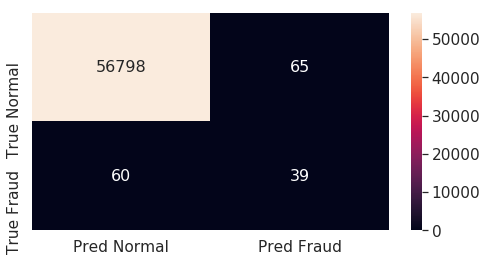

In [365]:
model_evaluate(ifo4,X4_val,y_val4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.4931588172912598
accuracy :  0.9976826656367402
sensitivity :  0.4489795918367347
specifity :  0.9986283061339336
precision :  0.36065573770491804
recall :  0.4489795918367347
f1 score :  0.4
Confusion matrix
TP =  44 FP =  78 FN =  54 TN =  56786


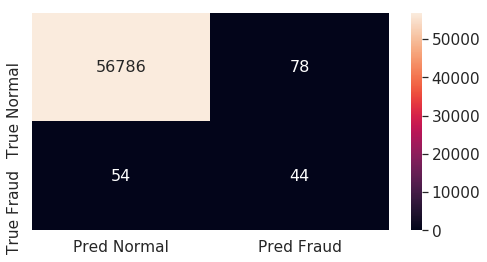

In [366]:
model_evaluate(ifo4, X4_test, y_test4)